In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import Data

# Visualisations

In [ ]:
df = Data.DF.copy()
df.dropna(subset=['job_country'], inplace=True)

In [4]:
df_countries = (
pd.pivot_table(data = df,
               index = ['job_title_short', 'job_country'],
               values = 'yearly_salary_avg',
               aggfunc = {'job_country':'count', 'yearly_salary_avg':'median'})
               .rename(columns={'job_country':'country_count'})
)

df_countries = df_countries.reset_index()

# Visualizations

Top 5 Countries Median Salaries for Each Job

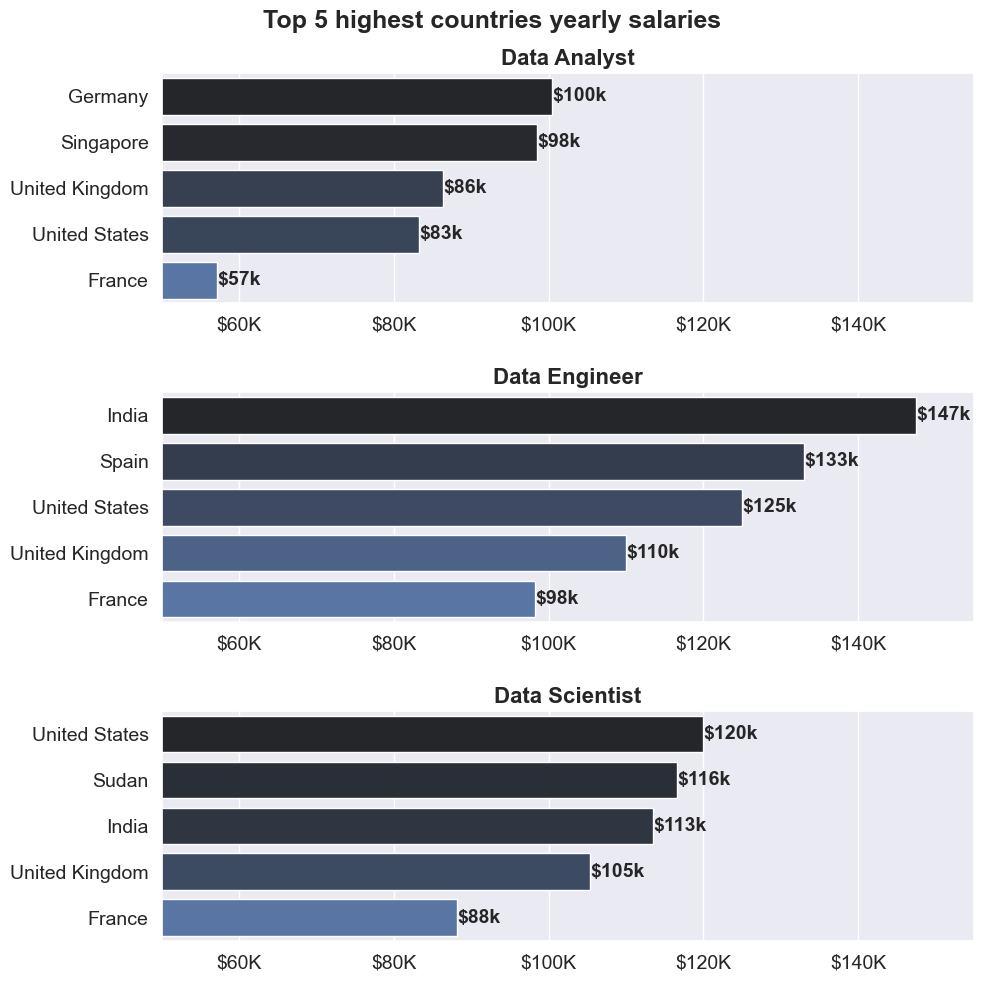

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
ntop_countries = 5                # --> No. of Top Skills

fig, ax = plt.subplots(len(job_titles), 1, figsize=(10,10))

for i, job_title in enumerate(job_titles):


    sns.set_theme()

    # Top demanded skills
    df_Topcountries = df_countries[df_countries['job_title_short'] == job_title] \
                            .nlargest(ntop_countries, 'country_count') \
                            .loc[:, 'job_country':'yearly_salary_avg'] \
                            .reset_index(drop=True)
    
    # ------------------------------------------ Top Countries salaries bar chart ------------------------------------------

    sns.barplot(data=df_Topcountries.sort_values('yearly_salary_avg', ascending=False), x='yearly_salary_avg', y='job_country', 
                ax=ax[i], legend=False, hue='yearly_salary_avg', palette='dark:b_r')
    
    ax[i].set_title(job_title, fontsize=16, fontweight='bold')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(50000, 155000)
    ax[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    ax[i].tick_params(axis='y', labelsize=14)
    ax[i].tick_params(axis='x', labelsize=14)


    for p in ax[i].patches: #Add values BESIDE horizontal bars
        ax[i].annotate(
        format(f'${int(p.get_width()/1000)}k'),  # show as integer with commas
        (p.get_x() + p.get_width() + 50,         # push text near the end of bar
         p.get_y() + p.get_height() / 2.), 
        ha='left', va='center',
        fontsize=14, fontweight='bold'
    )

    # ------------------------------------------ Figure title ------------------------------------------
    fig.suptitle(f'Top {ntop_countries} Highest Countries Yearly Salaries', fontsize=18, fontweight='bold')
    fig.tight_layout(h_pad=2)